## Linear Regression From Scratch without any libraries

Data Loading

In [11]:
import pandas as pd
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Linear Regression

In [12]:
def predict_sales(radio, weight, bias):
    return weight*radio + bias

In [13]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

In [14]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

In [15]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history


Training Model

In [16]:
radio = data['Radio'].values
sales = data['Sales'].values
weight = 0
bias = 0
lr = 0.01
iters = 100
train(radio,sales,weight,bias,lr,iters)

iter=0    weight=7.59    bias=0.3026    cost=3.8e+04
iter=10    weight=2405173039799.18    bias=73599287290.5942    cost=4.4e+27
iter=20    weight=815974020723917184827392.00    bias=24969141670289308909568.0000    cost=5.1e+50
iter=30    weight=276825655152063131060260668006465536.00    bias=8470979254131427124399864041963520.0000    cost=5.8e+73
iter=40    weight=93915298041452327294731439888541830077428531200.00    bias=2873846865521575588505351860423181092761108480.0000    cost=6.7e+96
iter=50    weight=31861509372640639389418406280951599831087152017021203382272.00    bias=974975331504933409782714414364953867539709003923550371840.0000    cost=7.7e+119
iter=60    weight=10809269636292856088171973252592657331885255059040396045391077683757056.00    bias=330768110314963329617902546569290030461484127346338398066860529549312.0000    cost=8.9e+142
iter=70    weight=3667130414430807992123323032464152800471756619739632767020847353568919970574761984.00    bias=1122157035834481873806553989304

(-1.006614932547681e+115,
 -3.08028322224193e+113,
 [38364.16330524686,
  7749556.174937002,
  1568119390.2759905,
  317310985414.3346,
  64208290697878.26,
  1.2992631155844442e+16,
  2.629075817425043e+18,
  5.3199691200807895e+20,
  1.0765026725753641e+23,
  2.1783171629468084e+25,
  4.4078531185034627e+27,
  8.919348130194725e+29,
  1.804841697960622e+32,
  3.652120656295389e+34,
  7.390113661054424e+36,
  1.4953991136399633e+39,
  3.0259595611633992e+41,
  6.123068538878864e+43,
  1.2390108847784284e+46,
  2.5071546445248688e+48,
  5.0732600405578486e+50,
  1.0265807693724723e+53,
  2.0772995423461308e+55,
  4.203442649007765e+57,
  8.505720885848681e+59,
  1.7211436869500366e+62,
  3.482756642128388e+64,
  7.047403375010331e+66,
  1.4260512414027028e+69,
  2.8856332394954074e+71,
  5.839116401378538e+73,
  1.1815528003416633e+76,
  2.3908874631539007e+78,
  4.837991886451058e+80,
  9.789739523118512e+82,
  1.9809665286729534e+85,
  4.00851154257525e+87,
  8.111275255984789e+89,
 

## Linear Regression From Scratch without Scikit-Learn

Imports

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

Data Loading and Processing

In [3]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [4]:
longitude = data['longitude'].values
latitude = data['latitude'].values
housing_median_age = data['housing_median_age'].values
total_rooms = data['total_rooms'].values
total_bedrooms = data['total_bedrooms'].values
population = data['population'].values
households = data['households'].values
median_income = data['median_income'].values
median_house_value = data['median_house_value'].values

mean_longitude = np.mean(longitude)
mean_latitude = np.mean(latitude)
mean_housing_median_age = np.mean(housing_median_age)
mean_total_rooms = np.mean(total_rooms)
mean_total_bedrooms = np.mean(total_bedrooms)
mean_population = np.mean(population)
mean_households = np.mean(households)
mean_median_income = np.mean(median_income)
mean_median_house_value = np.mean(median_house_value)

print("Mean Longitude:", mean_longitude)
print("Mean Latitude:", mean_latitude)
print("Mean Housing Median Age:", mean_housing_median_age)
print("Mean Total Rooms:", mean_total_rooms)
print("Mean Total Bedrooms:", mean_total_bedrooms)
print("Mean Population:", mean_population)
print("Mean Households:", mean_households)
print("Mean Median Income:", mean_median_income)
print("Mean Median House Value:", mean_median_house_value)

Mean Longitude: -119.5621082352941
Mean Latitude: 35.62522470588235
Mean Housing Median Age: 28.58935294117647
Mean Total Rooms: 2643.664411764706
Mean Total Bedrooms: 539.4108235294118
Mean Population: 1429.5739411764705
Mean Households: 501.2219411764706
Mean Median Income: 3.8835781000000007
Mean Median House Value: 207300.91235294117


Model Training and Accuracy

m = 6.969381760507142 
c = 188876.2058206864


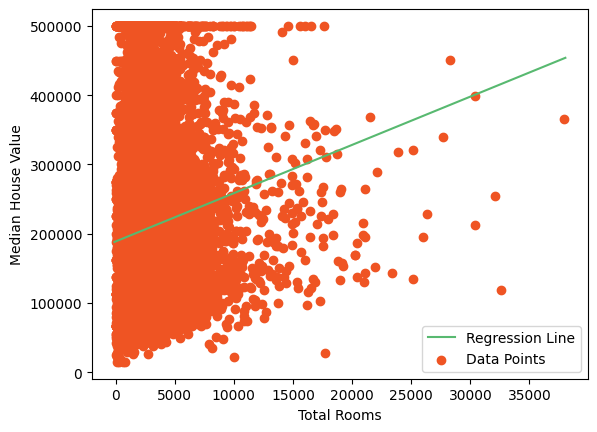

R-squared value: 0.01715876423117879


In [5]:
X = data['total_rooms'].values
Y = data['median_house_value'].values

# Calculate the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate m (slope) and c (intercept)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
slope = numer / denom
intercept = mean_y - (slope * mean_x)

print(f'm = {slope} \nc = {intercept}')

# Plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = intercept + slope * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Data Points')

plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Calculating R-squared value for measuring goodness of our model
ss_t = 0  # Total sum of squares
ss_r = 0  # Total sum of square of residuals

for i in range(m):  # m represents the number of input X values
    y_pred = intercept + slope * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)

print(f'R-squared value: {r2}')

## Linear Regression with Scikit-Learn


Imports

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [29]:
# Split data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Add a bias term (intercept)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [32]:
# Compute the coefficients using the Normal Equation
theta = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y

In [33]:
# Predictions
y_pred = X_scaled @ theta

In [34]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)

print("Coefficients:", theta)
print("Mean Squared Error:", mse)

Coefficients: [207300.91235294 -86499.60728226 -91744.05083061  14483.29860201
 -18263.60700749  49587.33777166 -44178.15153005  17470.57604338
  77291.55314914]
Mean Squared Error: 4824523173.926899
